데이콘 수화 이미지 분류 경진대회 : https://dacon.io/competitions/official/235896/overview/description

## 필수 라이브러리 import

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import tensorflow as tf

## 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
cd '/content/gdrive/My Drive/dataset/figure_image/'

/content/gdrive/My Drive/dataset/figure_image


In [8]:
!unzip -qq user_data.zip

In [6]:
ls

sample_submission.csv  test/  test.csv  train/  train.csv  user_data.zip


## 데이터 간단하게 살펴보기
- label 분포 비율(이게 제일 중요하지 않을까)
- train과 test 차이는 없는지

In [90]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [8]:
# train 데이터 셋은 총 858개. 근데 10-1, 10-2 이런건 뭐지?
train 

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9
...,...,...
853,854.png,9
854,855.png,1
855,856.png,4
856,857.png,10-1


In [9]:
train.info() # 결측치 여부 체크. non-null이므로 없네

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  858 non-null    object
 1   label      858 non-null    object
dtypes: object(2)
memory usage: 13.5+ KB


In [10]:
test # test 데이터셋은 215개이군. 저 이미지를 이용해 예측한 label을 만들어서 제출하면 됨

,file_name
0,001.png
1,002.png
2,003.png
3,004.png
4,005.png
...,...
210,211.png
211,212.png
212,213.png
213,214.png


In [11]:
# 데이터 비율은 비슷비슷한데 10-2가 상대적으로 제일 적네. 이부분 좀 염두해둬야 할듯
train['label'].value_counts()

2       83
4       83
10-1    82
7       82
8       79
9       79
5       79
6       79
1       79
3       77
10-2    56
Name: label, dtype: int64

## 데이터 전처리

### label 원핫 인코딩

In [12]:
train['label'].unique()

array(['10-2', '10-1', '3', '8', '9', '5', '2', '4', '7', '6', '1'],
      dtype=object)

In [13]:
# (이부분 생략) 일단 라벨 인코딩부터
encoder = LabelEncoder()
encoder.fit(train['label'].unique())
digit_label = encoder.transform(train['label'].unique())

print(digit_label)

[ 2  1  4  9 10  6  3  5  8  7  0]


In [14]:
# (이부분 생략) 그런 다음 원핫 인코딩
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(digit_label.reshape(-1, 1))
one_hot_label = one_hot_encoder.transform(digit_label.reshape(-1, 1))

print(one_hot_label.toarray())
print(one_hot_label.shape)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(11, 11)


In [109]:
# 그냥 pandas get_dummies 쓰면 한번에 원핫인코딩 해줌
train = pd.get_dummies(train, columns=['label']) 
train

,file_name,label_1,label_10-1,label_10-2,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,001.png,0,0,1,0,0,0,0,0,0,0,0
1,002.png,0,1,0,0,0,0,0,0,0,0,0
2,003.png,0,0,0,0,1,0,0,0,0,0,0
3,004.png,0,0,0,0,0,0,0,0,0,1,0
4,005.png,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
853,854.png,0,0,0,0,0,0,0,0,0,0,1
854,855.png,1,0,0,0,0,0,0,0,0,0,0
855,856.png,0,0,0,0,0,1,0,0,0,0,0
856,857.png,0,1,0,0,0,0,0,0,0,0,0


### 학습/검증 데이터셋 분리

In [110]:
train.iloc[0, 1:].values

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [111]:
X, y = train.iloc[:, 0].values, train.iloc[:, 1:].values
train_images, val_images, train_labels, val_labels = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [112]:
print(train_images.shape, val_images.shape)
print(train_labels.shape, val_labels.shape)

(600,) (258,)
(600, 11) (258, 11)


### 이미지 numpy 형태로 변환

(224, 224, 3)


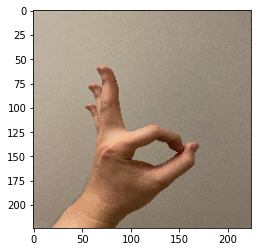

In [127]:
from PIL import Image

image = np.asarray(Image.open("./train/001.png"))
print(image.shape)

plt.imshow(image)

In [122]:
print(train_labels[0])
print(np.where(train_labels[0] == 1)[0][0])

[0 0 0 0 0 0 0 1 0 0 0]
7


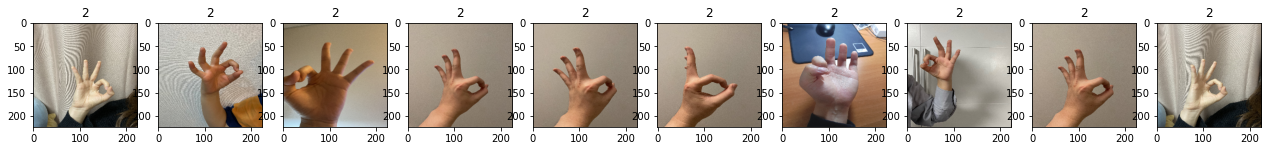

In [129]:
# 수화별 이미지 분류해서 보기(10개씩)
def show_figure(find_label):
    figure_file = []
    for idx, labels in enumerate(train_labels):
        label_index = np.where(labels == 1)[0][0]

        if find_label == label_index:
            figure_file.append(train_images[idx])

    ncols = 10
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):      
        axs[i].imshow(np.asarray(Image.open("./train/" + figure_file[i])))
        axs[i].set_title(find_label)

show_figure(2)

In [146]:
images = []
for image_file in tqdm(train_images):
    images.append(np.asarray(Image.open("./train/" + image_file)))

100%|██████████| 600/600 [00:01<00:00, 372.72it/s]


In [147]:
train_images = np.array(images)

In [148]:
images = []
for image_file in tqdm(val_images):
    images.append(np.asarray(Image.open("./train/" + image_file)))

100%|██████████| 258/258 [00:00<00:00, 361.04it/s]


In [149]:
val_images = np.array(images)

In [175]:
# 드디어 학습하기 좋은 형식으로 만들었다... (찾아가면서 하다보니 오래걸렸네;;)
print(train_images.shape, train_labels.shape)
print(val_images.shape, val_labels.shape)

(600, 224, 224, 3) (600, 11)
(258, 224, 224, 3) (258, 11)


## Baseline Model - CNN 으로 간단하게 만들기

### 모델 구성하기

In [228]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [229]:
'''
비전 시스템을 위한 딥러닝 - AlexNet 모형 인용
'''
input_tensor = Input(shape=(224, 224, 3))

# 첫번재 층(CONV + POOL + 배치 정규화)
x = Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu')(input_tensor)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2))(x)
x = BatchNormalization()(x)

# 두번째 층(CONV + POOL + 배치 정규화)
x = Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid')(x)
x = BatchNormalization()(x)

# 세번째 층(CONV + 배치정규화)
x = Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

# 네번째 층(CONV + 배치정규화)
x = Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

# 다섯번째 층(CONV + 배치정규화 + POOL)
x = Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid')(x)

x = Flatten()(x)

# 여섯번째 층(FC + 드롭아웃)
x = Dense(3072, activation='relu')(x)
x = Dropout(0.5)(x)

# 일곱번째 층(FC + 드롭아웃)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

# 여덟번째 층(FC 소프트맥스)
x = Dense(11, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=x)
model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_101 (Conv2D)         (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_89 (Bat  (None, 26, 26, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_102 (Conv2D)         (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 12, 12, 256)      0  

In [230]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [231]:
### keras callback 함수 지정

# validation loss가 향상되는 모델만 저장
mc = ModelCheckpoint(filepath = 'baseline.h5', monitor='val_accuracy', mode='max', 
                     verbose=1, save_best_only=True, restore_best_weights = True)

# 5번 iteration내에 validation loss가 향상되지 않으면 learning rate를 기존 learing rate * 0.2로 줄임
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, mode='min', verbose=1)

# 5번 iteration내에 validation loss가 향상되지 않으면 학습하지 않고 종료
ely_cb = EarlyStopping(monitor='val_loss', patience=15, mode='min', verbose=1)

In [219]:
history = model.fit(x=train_images, y=train_labels, batch_size=128, epochs=90, shuffle=True,
                    validation_data=(val_images, val_labels),  
                    callbacks=[mc, rlr_cb, ely_cb])

Epoch 1/90
5/5 [==============================] - ETA: 0s - loss: 19.5176 - accuracy: 0.0950
Epoch 1: val_accuracy improved from -inf to 0.09302, saving model to baseline.h5
5/5 [==============================] - 47s 732ms/step - loss: 19.5176 - accuracy: 0.0950 - val_loss: 18883.9023 - val_accuracy: 0.0930 - lr: 0.0010
Epoch 2/90
5/5 [==============================] - ETA: 0s - loss: 8.2804 - accuracy: 0.1567
Epoch 2: val_accuracy did not improve from 0.09302
5/5 [==============================] - 1s 129ms/step - loss: 8.2804 - accuracy: 0.1567 - val_loss: 10227.3789 - val_accuracy: 0.0930 - lr: 0.0010
Epoch 3/90
5/5 [==============================] - ETA: 0s - loss: 4.6787 - accuracy: 0.1717
Epoch 3: val_accuracy did not improve from 0.09302
5/5 [==============================] - 1s 119ms/step - loss: 4.6787 - accuracy: 0.1717 - val_loss: 6299.7607 - val_accuracy: 0.0930 - lr: 0.0010
Epoch 4/90
5/5 [==============================] - ETA: 0s - loss: 3.4586 - accuracy: 0.2050
Epoch 4: 

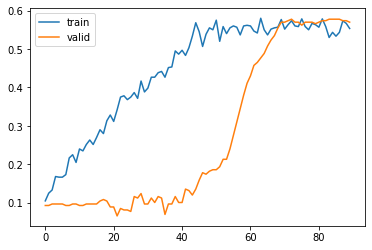

In [233]:
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

show_history(history)

In [51]:
preds = model.predict(np.expand_dims(train_images[0], axis=0))

In [52]:
print('예측 결과 shape: ', preds.shape)
print('예측 결과: ', preds)

예측 결과 shape:  (1, 11)
예측 결과:  [[2.5333877e-09 1.6811719e-12 3.9301217e-14 4.1084241e-17 1.7637727e-16
  3.3251323e-12 3.2782427e-06 9.9999654e-01 2.4108164e-07 7.1673487e-12
  7.2105782e-13]]


### 예측 데이터 제출하기

In [88]:
test

,file_name
0,001.png
1,002.png
2,003.png
3,004.png
4,005.png
...,...
210,211.png
211,212.png
212,213.png
213,214.png


In [234]:
model.load_weights('baseline.h5')

In [235]:
for test_file in tqdm(test['file_name']):
    image_np = np.asarray(Image.open("./test/" + test_file))
    preds = model.predict(np.expand_dims(image_np, axis=0))

    preds_label = np.argmax(preds)
    if preds_label == 1:
        preds_label = '10-1'
    elif preds_label == 2:
        preds_label = '10-2'
    elif preds_label == 0:
        preds_label = '1'
    else:
        preds_label = str(preds_label - 1)

    submission.loc[submission.file_name == test_file, 'label'] = preds_label
    # submission[submission['file_name'] == test_file]['label'] = preds_label

100%|██████████| 215/215 [00:11<00:00, 18.47it/s]


In [236]:
submission

,file_name,label
0,001.png,1
1,002.png,10-1
2,003.png,1
3,004.png,5
4,005.png,8
...,...,...
210,211.png,9
211,212.png,9
212,213.png,9
213,214.png,7


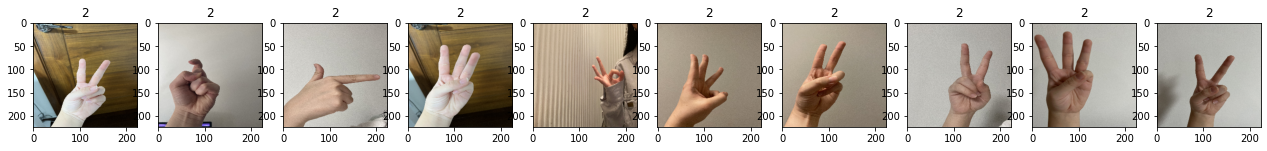

In [239]:
# 제대로 예측했는지 수화별 이미지 분류해서 보기(10개씩)
def show_submit(find_label):
    figure_file = []
    for idx, label in enumerate(submission['label']):
        if find_label == label:
            # print(submission['file_name'].loc[idx])
            figure_file.append(submission['file_name'].loc[idx])

    ncols = 10
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):      
        axs[i].imshow(np.asarray(Image.open("./test/" + figure_file[i])))
        axs[i].set_title(find_label)

show_submit('2')

In [238]:
submission.to_csv('submit.csv', index=False)

## 데이터 증강 적용해보기

In [243]:
# 데이터 증강 
from keras.preprocessing.image import ImageDataGenerator

tr_gen = ImageDataGenerator(
    rescale=1/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=30,
    zoom_range=0.2
)

val_gen = ImageDataGenerator(
    rescale=1/255.0
)

flow_tr_gen = tr_gen.flow(x=train_images, y=train_labels, batch_size=128, shuffle=True)
flow_val_gen = val_gen.flow(x=val_images, y=val_labels, batch_size=128, shuffle=False)

In [183]:
train_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

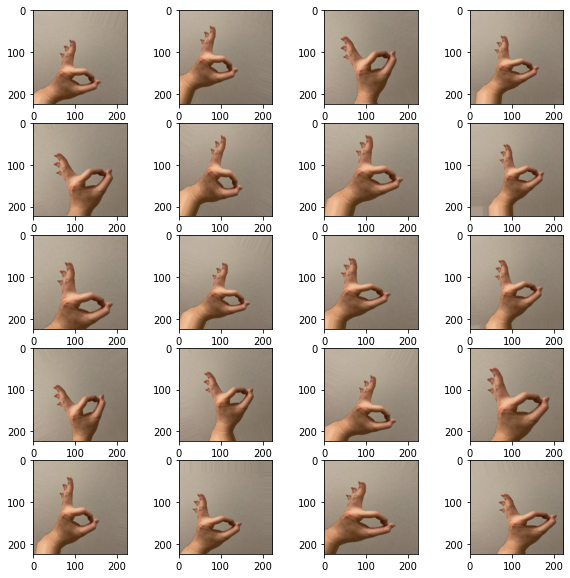

In [244]:
# 데이터 증강을 적용했을때 이미지 변환모습
x = np.asarray(Image.open("./train/001.png"))
x = np.expand_dims(x, axis=0)
# y = np.expand_dims(train_labels[0], axis=0)

idx = 0
fig = plt.figure(figsize=(10, 10))
axs = []
for batch in tr_gen.flow(x, batch_size=1): # 여기서 batch는 x가 됨
    # print(batch)
    axs.append(fig.add_subplot(5, 4, idx+1))
    axs[idx].imshow((batch[0]))
    idx += 1
    if idx%20 == 0:
        break

fig.show()

In [ ]:
history = model.fit(flow_tr_gen, epochs=90, validation_data=flow_val_gen, callbacks=[mc, rlr_cb])